## Sect2. Linear Regression

Hypothesis and cost function
$$H(x) = Wx+b$$ $$cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

### TensorFlow Mechanics
1. Build graph using TF operations
2. Run graph and get results
3. Update graph and get results

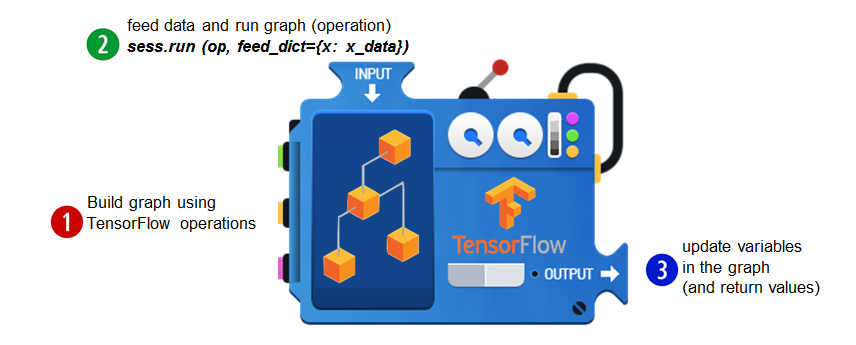

### Ex1. Variable 사용
$$H(x) = Wx+b$$

x, y 값이 주어졌을 때, W, b 값을 예측하기

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [1]:
from tqdm import tqdm_notebook
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 랜던숫자)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [2]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));

step=0, 	 cost=0.02469269372522831,  	 W=[0.80773777],  	 b=[0.39156017]
step=1, 	 cost=0.024192964658141136,  	 W=[0.81001985],  	 b=[0.39141944]
step=2, 	 cost=0.023775508627295494,  	 W=[0.81209457],  	 b=[0.39119026]
step=3, 	 cost=0.023423174396157265,  	 W=[0.8139848],  	 b=[0.39088267]
step=4, 	 cost=0.02312248758971691,  	 W=[0.8157109],  	 b=[0.3905056]
step=200, 	 cost=0.008718051016330719,  	 W=[0.8915559],  	 b=[0.24651885]
step=400, 	 cost=0.003328990191221237,  	 W=[0.9329881],  	 b=[0.15233377]
step=600, 	 cost=0.0012711662566289306,  	 W=[0.9585906],  	 b=[0.09413303]
step=800, 	 cost=0.0004853944992646575,  	 W=[0.97441155],  	 b=[0.05816856]
step=1000, 	 cost=0.00018534679838921875,  	 W=[0.9841879],  	 b=[0.03594462]
step=1200, 	 cost=7.077478221617639e-05,  	 W=[0.9902292],  	 b=[0.0222116]
step=1400, 	 cost=2.702580241020769e-05,  	 W=[0.99396217],  	 b=[0.0137254]
step=1600, 	 cost=1.0319637112843338e-05,  	 W=[0.996269],  	 b=[0.00848147]
step=1800, 	 cost=3.9406

### Ex2. Plaeholder 사용
데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [4]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [5]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=6.591865539550781, 	 W=[0.57604367], 	 b=[-1.4152654]
step=1, 	 cost=5.241800785064697, 	 W=[0.67222357], 	 b=[-1.3700019]
step=2, 	 cost=4.174496650695801, 	 W=[0.7576161], 	 b=[-1.3294908]
step=3, 	 cost=3.3307008743286133, 	 W=[0.83341825], 	 b=[-1.2932056]
step=4, 	 cost=2.663576126098633, 	 W=[0.90069413], 	 b=[-1.2606783]
step=200, 	 cost=0.05834268406033516, 	 W=[1.2798619], 	 b=[-0.636192]
step=400, 	 cost=0.02227807603776455, 	 W=[1.1729375], 	 b=[-0.39312798]
step=600, 	 cost=0.008506827987730503, 	 W=[1.1068648], 	 b=[-0.24292886]
step=800, 	 cost=0.003248314606025815, 	 W=[1.0660359], 	 b=[-0.15011509]
step=1000, 	 cost=0.0012403723085299134, 	 W=[1.0408062], 	 b=[-0.09276218]
step=1200, 	 cost=0.00047362843179143965, 	 W=[1.0252156], 	 b=[-0.05732112]
step=1400, 	 cost=0.0001808544184314087, 	 W=[1.0155817], 	 b=[-0.0354209]
step=1600, 	 cost=6.906086491653696e-05, 	 W=[1.0096285], 	 b=[-0.02188808]
step=1800, 	 cost=2.6370651539764367e-05, 	 W=[1.00595], 	 

In [6]:
W_val, W_val[0], type(W_val[0])

(array([1.0036768], dtype=float32), 1.0036768, numpy.float32)

In [7]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[-0.00835816]', -0.00835816003382206)

### Ex3. Plaeholder 사용
exptected : W=1, b=1.1

- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]

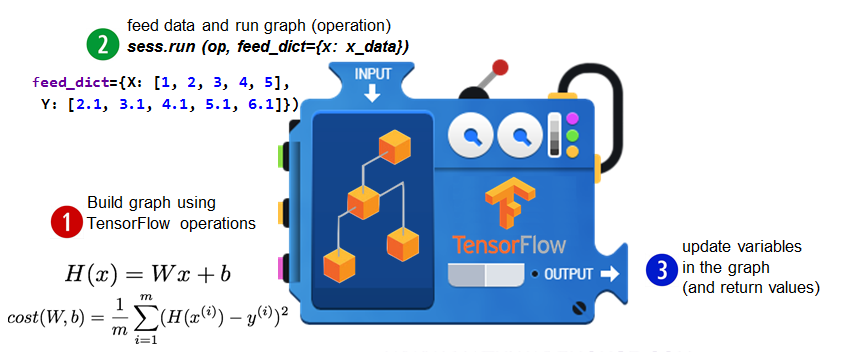

In [8]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in range(2001):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=1.2041550874710083, 	 W=[1.0693693],  	 b=[0.01358839]
step=1, 	 cost=0.7810412645339966, 	 W=[1.1192927],  	 b=[0.03115446]
step=2, 	 cost=0.5339359045028687, 	 W=[1.157179],  	 b=[0.04537381]
step=3, 	 cost=0.3894032835960388, 	 W=[1.1858772],  	 b=[0.05703559]
step=4, 	 cost=0.3046484887599945, 	 W=[1.2075621],  	 b=[0.06674224]
step=5, 	 cost=0.2547328770160675, 	 W=[1.2238939],  	 b=[0.07495367]
step=6, 	 cost=0.2251235544681549, 	 W=[1.23614],  	 b=[0.08202096]
step=7, 	 cost=0.2073509246110916, 	 W=[1.245268],  	 b=[0.08821214]
step=8, 	 cost=0.19647976756095886, 	 W=[1.2520163],  	 b=[0.09373181]
step=9, 	 cost=0.1896340548992157, 	 W=[1.2569488],  	 b=[0.0987362]
step=100, 	 cost=0.09815245866775513, 	 W=[1.2027112],  	 b=[0.36814803]
step=200, 	 cost=0.04985827952623367, 	 W=[1.144476],  	 b=[0.5783956]
step=300, 	 cost=0.025326374918222427, 	 W=[1.1029707],  	 b=[0.72824305]
step=400, 	 cost=0.012864975258708, 	 W=[1.073389],  	 b=[0.8350418]
step=500, 	 cost=

### Ex4. Linear Regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


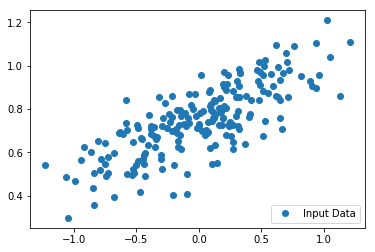

In [10]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [11]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()


 y = [0.48449567] x + [0.74525785] 


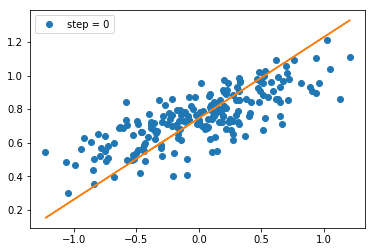


 y = [0.43082336] x + [0.7457666] 


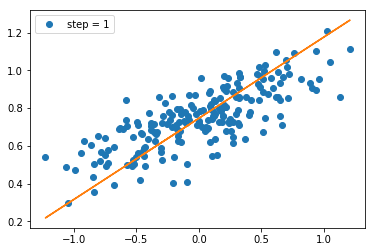


 y = [0.38984603] x + [0.74620456] 


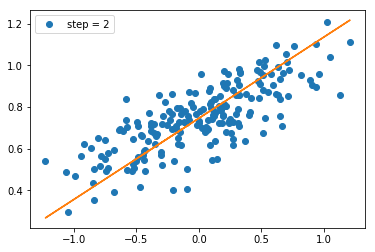


 y = [0.3585606] x + [0.7465389] 


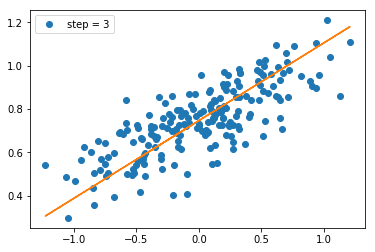


 y = [0.33467472] x + [0.74679416] 


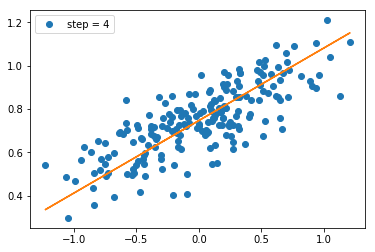


 y = [0.25757092] x + [0.74761814] 


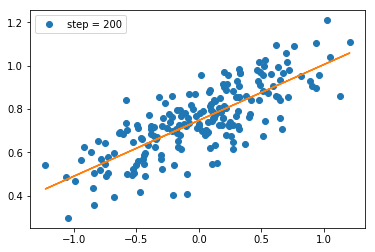


 y = [0.25757092] x + [0.74761814] 


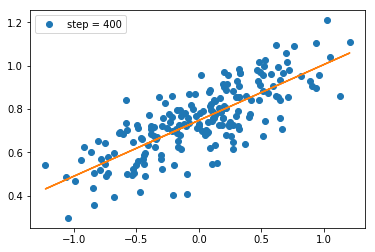


 y = [0.25757092] x + [0.74761814] 


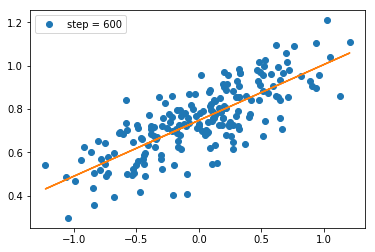


 y = [0.25757092] x + [0.74761814] 


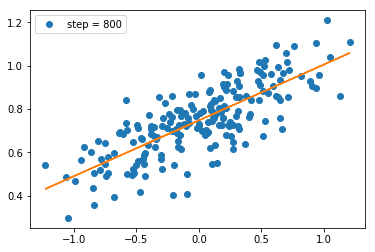


 y = [0.25757092] x + [0.74761814] 


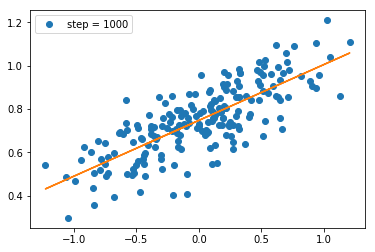


 y = [0.25757092] x + [0.74761814] 


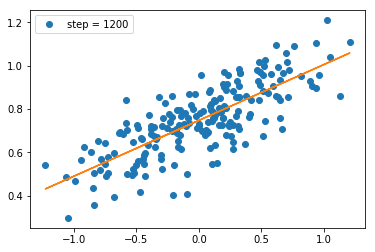


 y = [0.25757092] x + [0.74761814] 


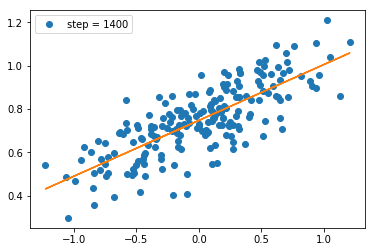


 y = [0.25757092] x + [0.74761814] 


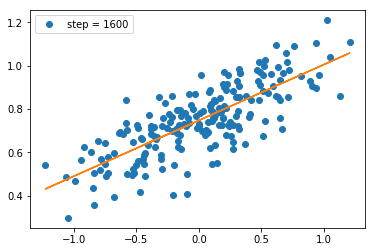


 y = [0.25757092] x + [0.74761814] 


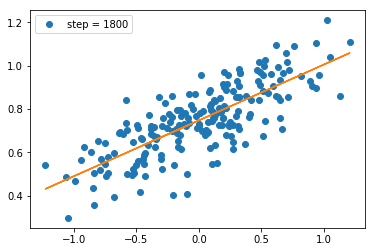


 y = [0.25757092] x + [0.74761814] 


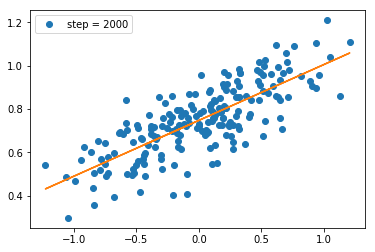

In [12]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()